In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('happiness_score_dataset.csv')
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [4]:
import seaborn as sns
sns.set()

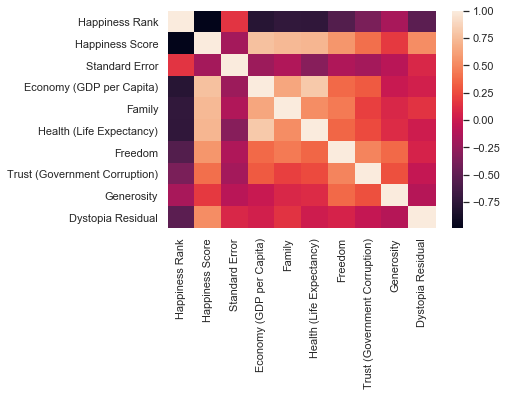

In [5]:
sns.heatmap(data.corr())
plt.show()

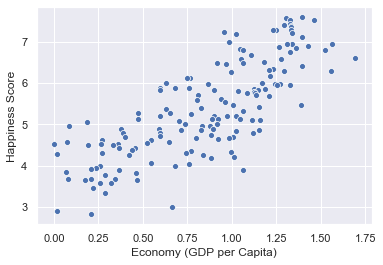

In [6]:
sns.scatterplot(data['Economy (GDP per Capita)'],data['Happiness Score'])
plt.show()

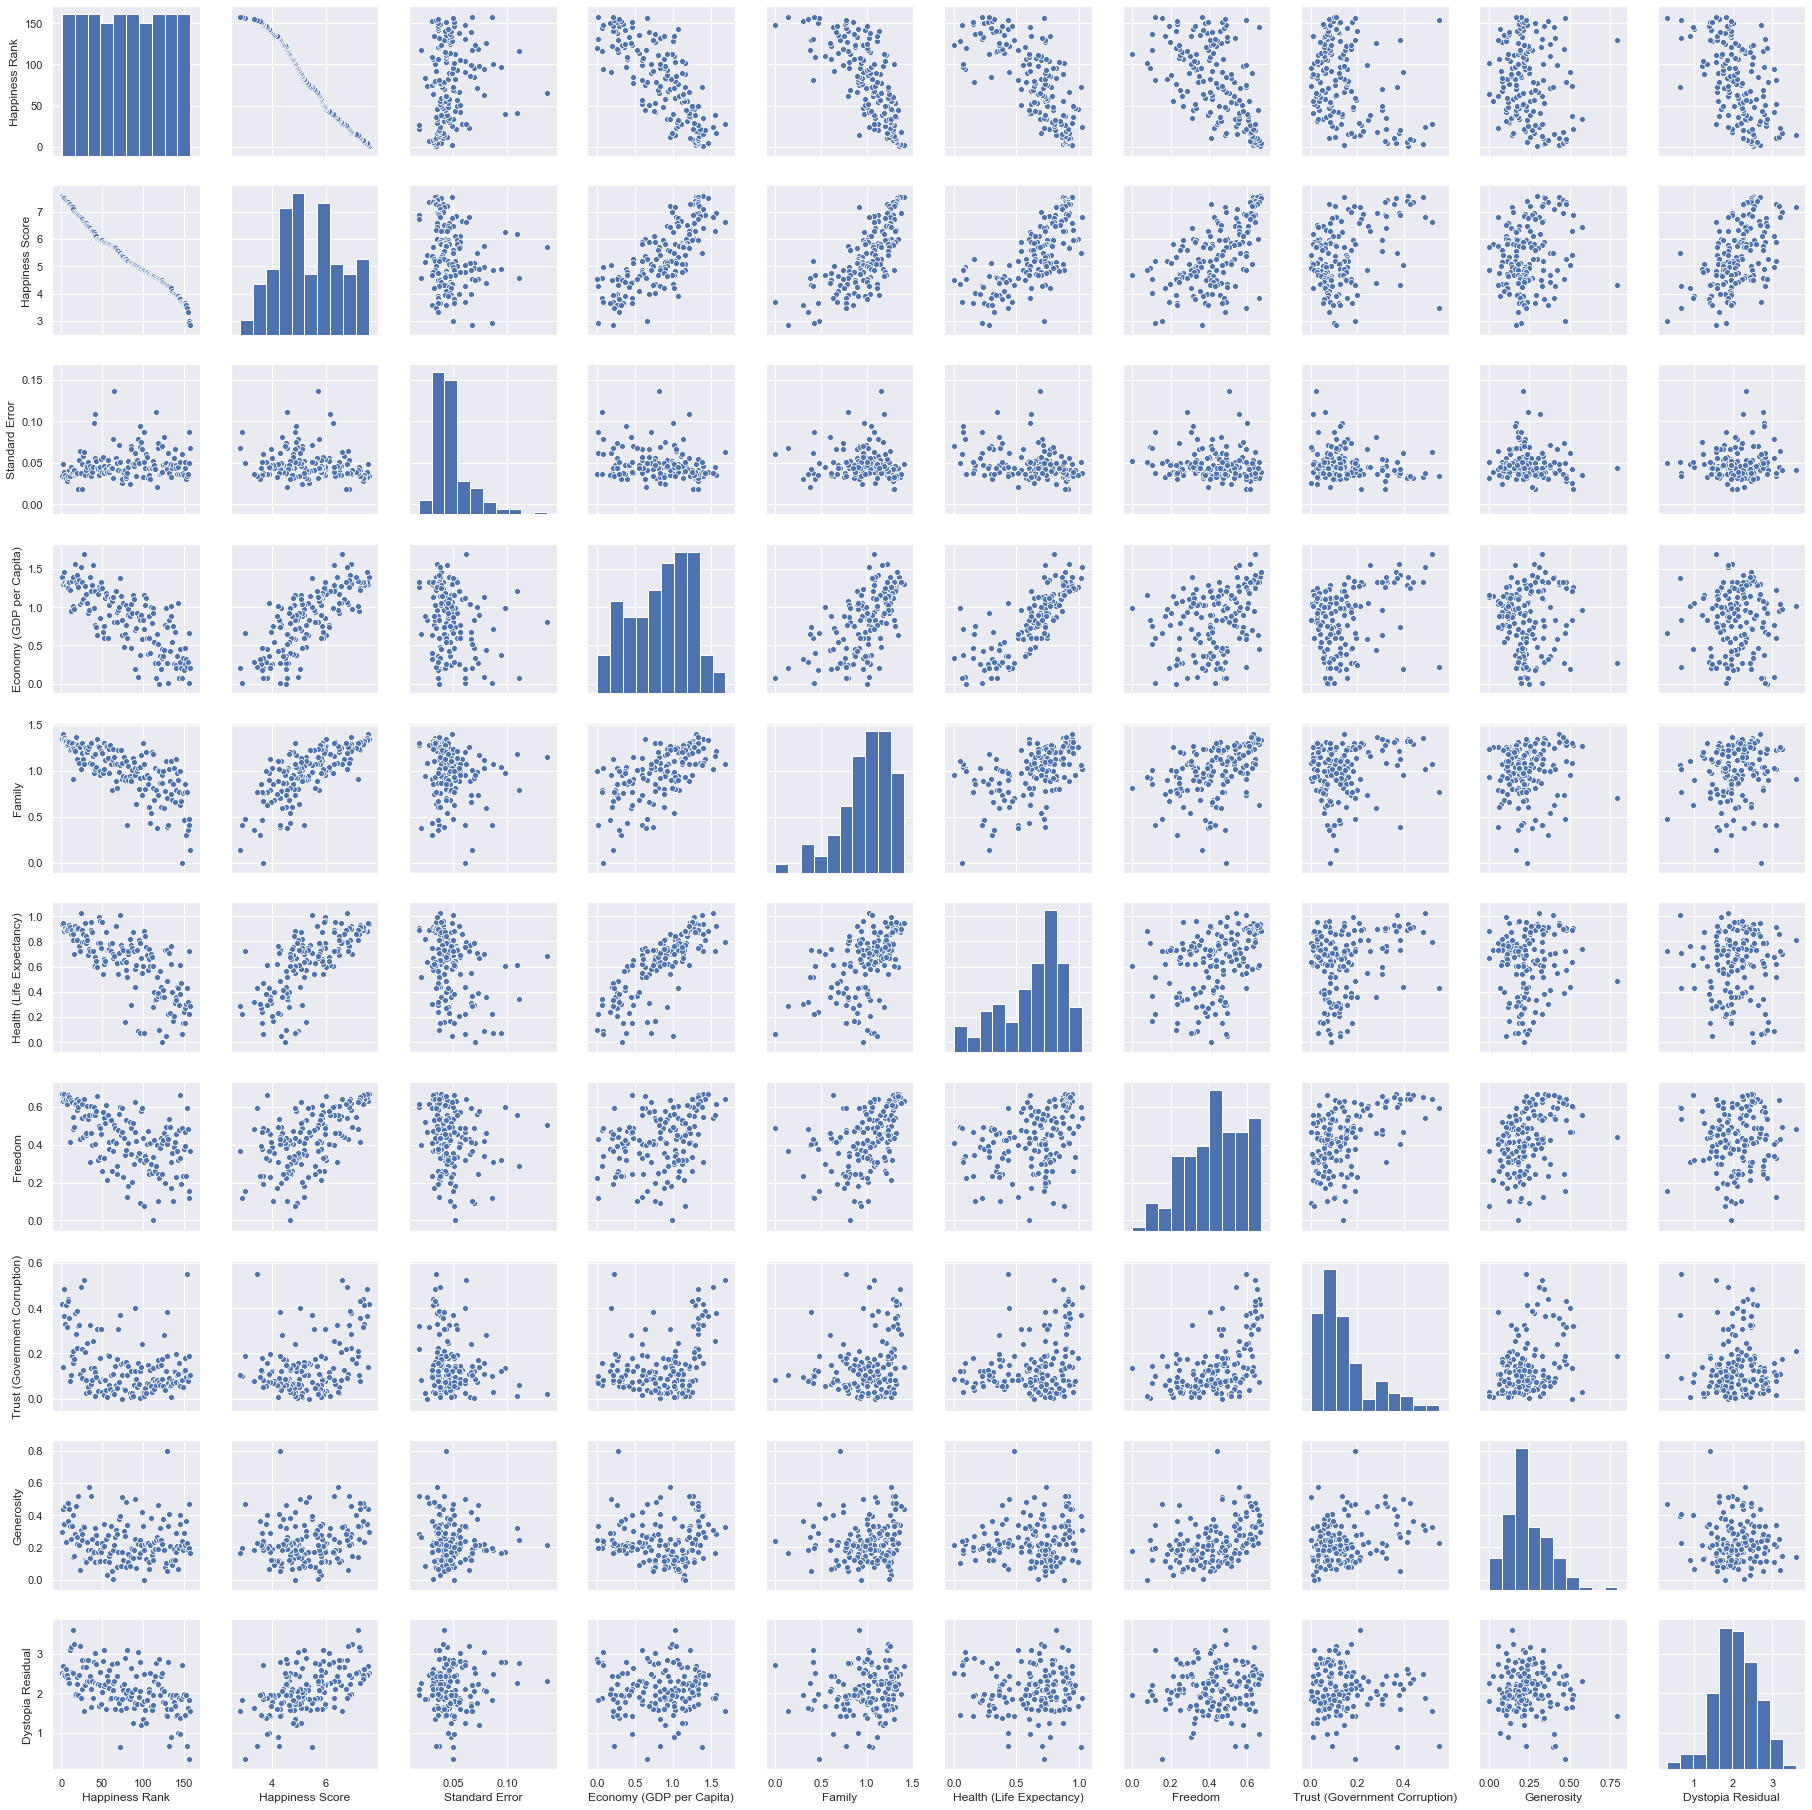

In [7]:
sns.pairplot(data)
plt.show()

# Note that Happiness score and Happiness rank have very strong correlation but their relationship is not linear, we shall deal with it later considering a cubic relationship.

In [8]:
import scipy.stats

In [9]:
col_names=data.columns
col_names

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [10]:
Col_names=['Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']
#for j in Col_names:
#    if abs(scipy.stats.skew(data[j]))>0.1:
#        data[j]=np.log10(data[j])
#data.isnull().sum()

In [11]:
scipy.stats.skew(data[Col_names])

array([ 4.14485990e-04,  9.68384478e-02,  1.96455940e+00, -3.14551717e-01,
       -9.97308694e-01, -6.98614592e-01, -4.09526303e-01,  1.37227463e+00,
        9.92423095e-01, -2.36636661e-01])

In [12]:
data.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


# As happiness rank can be easily be found from happiness score we are not considering Happiness rank as an independent varible while rooting for happiness score

In [13]:
X=data.drop(['Country','Region','Happiness Rank','Happiness Score'],axis=1)

In [14]:
X

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [15]:
y=data['Happiness Score']

In [16]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [17]:
X.describe()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [18]:
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [19]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.25)

In [20]:
linear_pipeline=Pipeline([('Normalization',StandardScaler()),('Decomposition',PCA(n_components=4)),('Linear Regression',LinearRegression())])
linear_pipeline.fit(X_train,y_train)
metrics.r2_score(linear_pipeline.predict(X_test),y_test)

0.9814960950781645

In [21]:
rf_pipeline=Pipeline([('Normalization',StandardScaler()),('Decomposition',PCA(n_components=4)),('Random Forest Regressor',LinearRegression())])
linear_pipeline.fit(X_train,y_train)
metrics.r2_score(linear_pipeline.predict(X_test),y_test)

0.9814960950781645

# Now that's been dealt with; we dive into predicting Happines Rank from Happiness Score

In [22]:
a=data['Happiness Score']
b=a*a
c=a*a*a
d={'Linear':a,'quadratic':b,'cubic':c}
G=pd.DataFrame(d)

In [23]:
G

,Linear,quadratic,cubic
0,7.587,57.562569,436.727211
1,7.561,57.168721,432.252699
2,7.527,56.655729,426.447672
3,7.522,56.580484,425.598401
4,7.427,55.160329,409.675763
...,...,...,...
153,3.465,12.006225,41.601570
154,3.340,11.155600,37.259704
155,3.006,9.036036,27.162324
156,2.905,8.439025,24.515368


In [24]:
h=data['Happiness Rank']
h

0        1
1        2
2        3
3        4
4        5
      ... 
153    154
154    155
155    156
156    157
157    158
Name: Happiness Rank, Length: 158, dtype: int64

In [25]:
G_train,G_test,h_train,h_test=model_selection.train_test_split(G,h,test_size=0.25)

In [26]:
linear_pipeline=Pipeline([('Normalization',StandardScaler()),('Decomposition',PCA(n_components=2)),('Linear Regression',LinearRegression())])
linear_pipeline.fit(G_train,h_train)
metrics.r2_score(linear_pipeline.predict(G_test),h_test)

0.982802077956043

In [28]:
from sklearn.externals import joblib
joblib.dump(linear_pipeline,'Happiness_rank.pkl')
joblib.dump(rf_pipeline,'Happiness_index.pkl')

['Happiness_index.pkl']